In [125]:
import yaml
import matplotlib.pyplot as plt
import pandas as pd
import os
import pickle
from sklearn.metrics import r2_score
from xgboost import plot_importance


%matplotlib inline
%run PlotFactory.py

plt.rc('font', size=24)
plt.rc('axes', titlepad = 20)
plt.rcParams["figure.figsize"] = [16,10]
config = yaml.safe_load(open("../../src/config.yml"))

In [114]:
df_test = pd.read_csv(config['path']['processed_data']+'ready_to_use_data_test.csv')

## The calculation of the relative error threshold curves

The function for creating the relative error threshold curve plot is inside plot_factory.py. The next three cells contain the code for the plots of the THSA, RHSA, and LPHSA curves. The R2 is also provided. 

In [128]:
names =  {'gfm':'GFM', 'nsp2_gfm':'Combination Model', 'tfm':'TFM', 'length':'Naive Model'}
pred_dict = {'NetSurfP2':df_test['thsa_netsurfp2']}
for name in names:
    if name == 'tfm':
        result = pd.read_csv('../../data/predictions/thsa_tfm_prediction.csv')['x']
    else:
        result = pd.read_csv('../../data/predictions/thsa_'+name+'_prediction.csv')['prediction']
    
    pred_dict[names[name]] = result
    
for name in pred_dict:
    print('R2 score ',name, r2_score(df_test['thsa'], pred_dict[name]))

xlab = 'Error threshold (%)'
ylab = 'Correctly predicted (%)'
title = 'Relative error threshold curve for predicting THSA'
plot_curve(df_test['thsa'], pred_dict, 100, xlab, ylab, title)

R2 score  NetSurfP2 0.9150507663407101
R2 score  GFM 0.7540891715058301
R2 score  Combination Model 0.9123645802082502
R2 score  TFM 0.7092106322452914
R2 score  Naive Model 0.7159218320167122


R2 score  NetSurfP2 0.7684990757381781
R2 score  GFM 0.40188392023956254
R2 score  Combination Model 0.7825153868421194
R2 score  TFM 0.13396641743467652
R2 score  Naive Model 0.046719005149295945


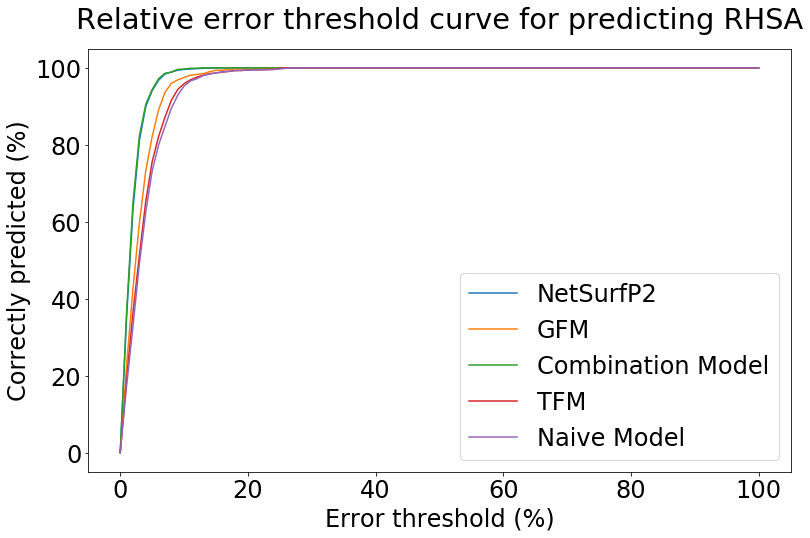

In [130]:
names =  {'gfm':'GFM', 'nsp2_gfm':'Combination Model', 'tfm':'TFM', 'length':'Naive Model'}
pred_dict = {'NetSurfP2':df_test['rhsa_netsurfp2']}
for name in names.keys():
    if name == 'tfm':
        result = pd.read_csv('../../data/predictions/rhsa_tfm_prediction.csv')['x']
    else:
        result = pd.read_csv('../../data/predictions/rhsa_'+name+'_prediction.csv')['prediction']
    
    pred_dict[names[name]] = result

for name in pred_dict:
    print('R2 score ',name, r2_score(df_test['rhsa'], pred_dict[name]))
    
xlab = 'Error threshold (%)'
ylab = 'Correctly predicted (%)'
title = 'Relative error threshold curve for predicting RHSA'
plot_perc_curve(df_test['rhsa'], pred_dict, 100, xlab, ylab, title)

R2 score  NetSurfP2 trained model 0.430891519315191
R2 score  GFM 0.12184275218819474
R2 score  Combination Model 0.4493733536193497
R2 score  TFM -0.003208559248944809
R2 score  Naive Model 0.007725849514613858


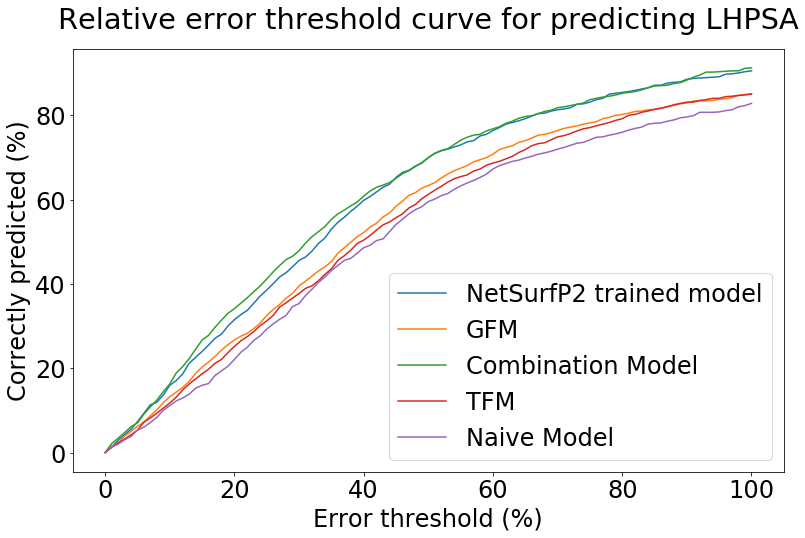

In [131]:
names =  {'nsp2':'NetSurfP2 trained model', 'gfm':'GFM', 'nsp2_gfm':'Combination Model', 'tfm':'TFM', 'length':'Naive Model'}
pred_dict = {}
for name in names:
    if name == 'tfm':
        result = pd.read_csv('../../data/predictions/lhpsa_tfm_prediction.csv')['x']
    else:
        result = pd.read_csv('../../data/predictions/lhpsa_'+name+'_prediction.csv')['prediction']

    pred_dict[names[name]] = result

for name in pred_dict:
    print('R2 score ',name, r2_score(df_test['size'], pred_dict[name]))
    
xlab = 'Error threshold (%)'
ylab = 'Correctly predicted (%)'
title = 'Relative error threshold curve for predicting LHPSA'
plot_curve(df_test['size'], pred_dict, 100, xlab, ylab, title)

## Feature importance of the top performing self-trained models

The feature importance of the top performing models that were self-trained are shown in the next three cells. These models are GFM for the THSA and RHSA and the combination model for the LPHSA. The top 5 F-scores of each model model is shown in a horizontal bar chart to show the best performing features

In [118]:
plt.rc('font', size=30)

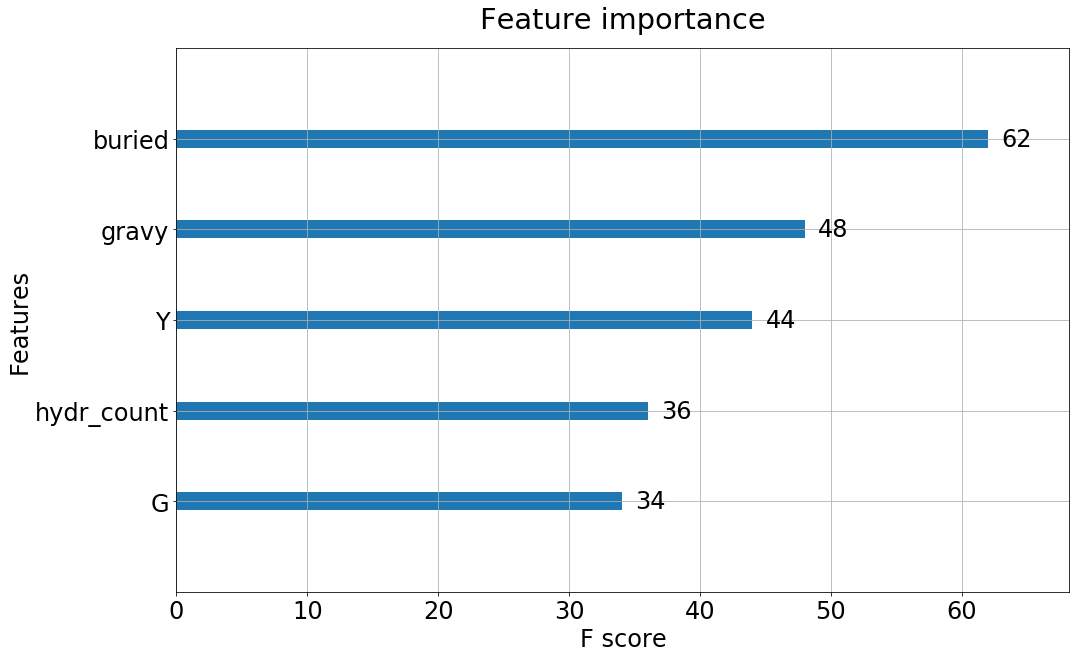

In [132]:
file_name = 'thsa_gfm.model'
filename = os.path.join(config['path']['model'], file_name)
loaded_model = pickle.load(open(filename, 'rb'))

plot_importance(loaded_model.best_estimator_, max_num_features=5)

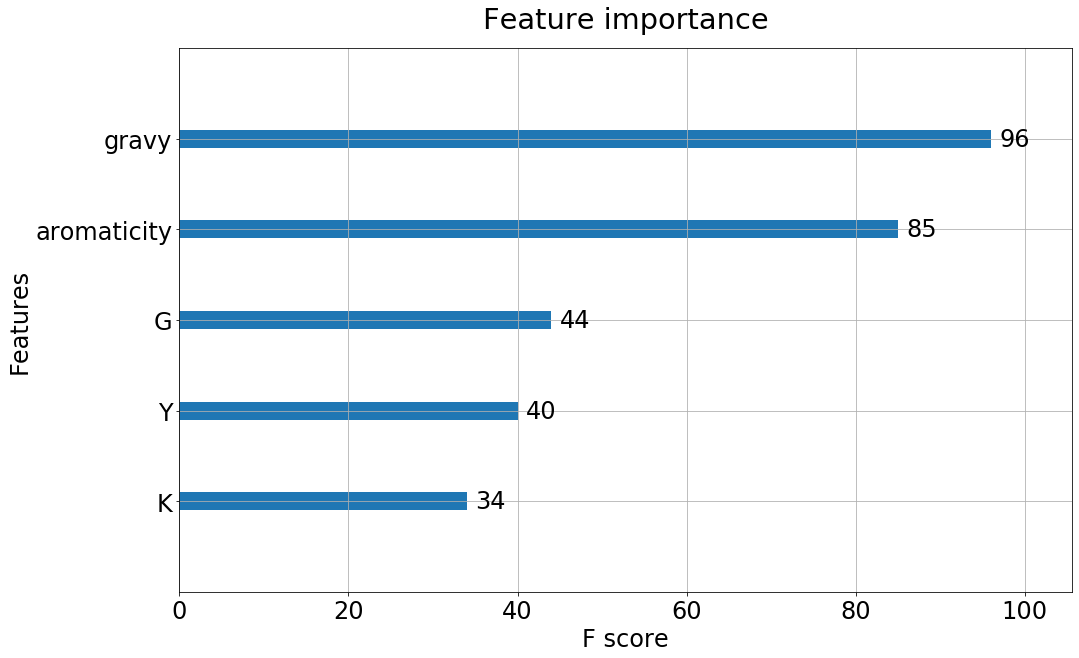

In [133]:
file_name = 'rhsa_gfm.model'
filename = os.path.join(config['path']['model'], file_name)
loaded_model = pickle.load(open(filename, 'rb'))

plot_importance(loaded_model.best_estimator_, max_num_features=5)

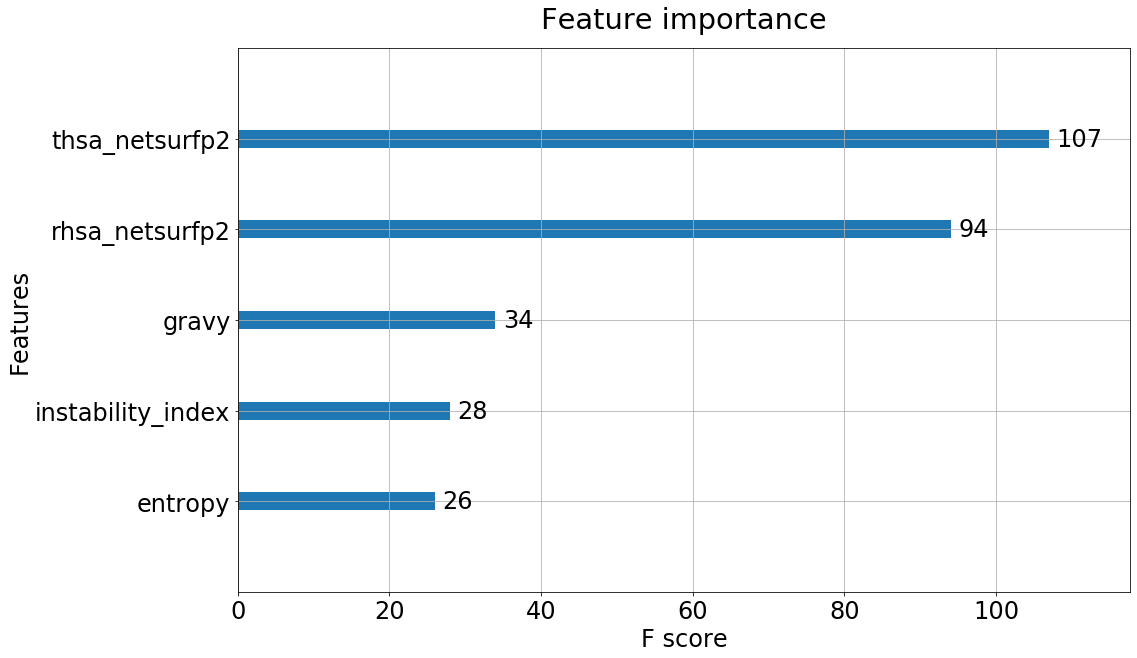

In [134]:
file_name = 'lhpsa_nsp2_gfm.model'
filename = os.path.join(config['path']['model'], file_name)
loaded_model = pickle.load(open(filename, 'rb'))


plot_importance(loaded_model.best_estimator_, max_num_features=5)

## Relation between the TASA and sequence length

in this figure, the number of residues of a protein isplotted against the TASA in a density heatmap. Instead of an linear relation, a slight bend can be observed which is especially clear in the shorter sequence length ranges.

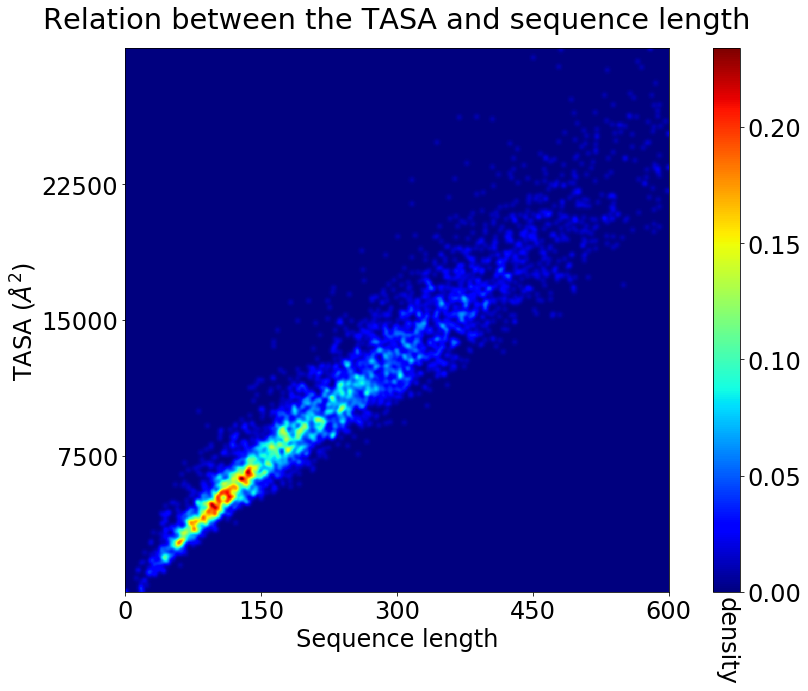

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.ndimage.filters import gaussian_filter


def myplot(x, y, s, bins=1000):
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins)
    heatmap = gaussian_filter(heatmap, sigma=s)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    return heatmap.T, extent


df_all = pd.read_csv(config['path']['processed_data']+'ready_to_use_data.csv')

# Generate some test data
df_all = df_all[df_all['length'] < 600]
df_all = df_all[df_all['tasa'] < 30000]

x = df_all['length']
y = df_all['tasa']

fig, ax = plt.subplots(1, 1)
img, extent = myplot(x, y, 4)
final_img = ax.imshow(img,extent=[0,1,0,1], origin='lower', cmap=cm.jet)

ax.set_yticks([0.25,0.5,0.75])
ax.set_yticklabels(['7500','15000','22500','30000'])
ax.set_ylabel(r'TASA ($\AA^2$)')

ax.set_xticks([0,0.25,0.5,0.75,1])
ax.set_xticklabels(['0','150','300','450','600'])
ax.set_xlabel('Sequence length')
cbar = plt.colorbar(final_img)
cbar.ax.set_xlabel('density', rotation=270)

plt.title('Relation between the TASA and sequence length')
plt.show()


# Figures MolPatch Atom-based

In [64]:
from scipy.stats import wilcoxon

plt.rc('font', size=14)
plt.rc('axes', titlepad = 10)
plt.rcParams["figure.figsize"] = [16,10]

In [90]:
df_atom = pd.read_csv('../../data/patches/lp_pisite_atom.csv')
df_atom['percentage_interaction'] = df_atom['interaction_site']/df_atom['residues_in_patch']
df_atom['random'] = df_atom['random']/df_atom['residues_in_patch']
df_atom = df_atom[df_atom['random'] <= 1]

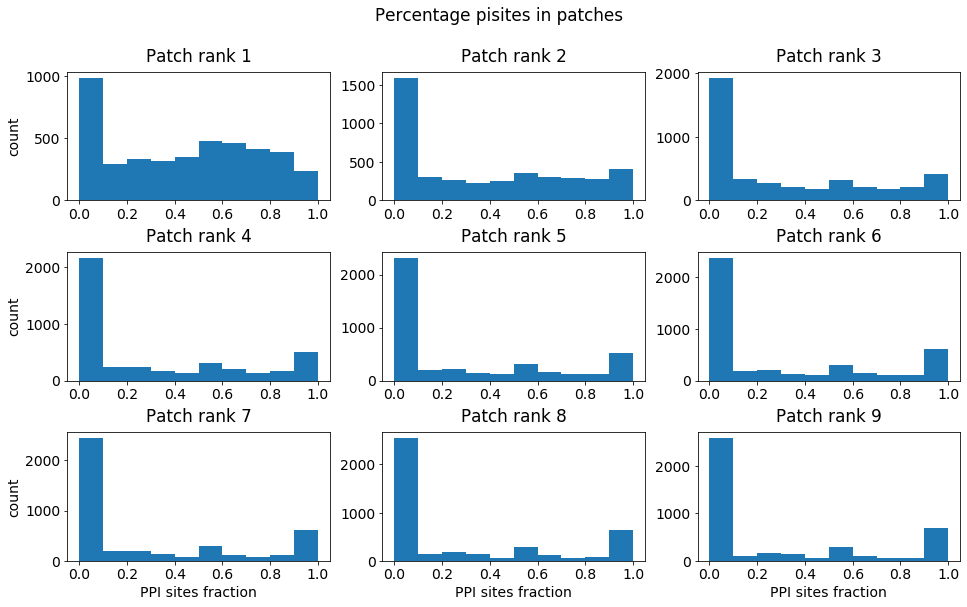

In [100]:
x, y = 3, 3
fig, axs = plt.subplots(x, y, figsize=(16, 9))
fig.suptitle('Percentage pisites in patches')

for i in range(x):
    for j in range(y):
        
        axs[i, j].hist(df_atom[df_atom['rank'] == i*3+j+1]['percentage_interaction'])
        axs[i, j].set_title('Patch rank '+str(i*3+j+1))
        if i == 2:
            axs[i, j].set(xlabel='PPI sites fraction')
        if j == 0:
            axs[i, j].set(ylabel='count')
    
plt.subplots_adjust(hspace=.4)

In [101]:
for x in range(1,6):
    df_rank = df_atom[df_atom['rank'] == x]
    print('rank '+str(x),wilcoxon(df_rank['percentage_interaction'],df_rank['random']))

rank 1 WilcoxonResult(statistic=1205243.5, pvalue=5.1956819363420914e-291)
rank 2 WilcoxonResult(statistic=2010628.0, pvalue=3.1673395865864985e-88)
rank 3 WilcoxonResult(statistic=2379452.0, pvalue=2.9640634459287477e-15)
rank 4 WilcoxonResult(statistic=2235761.5, pvalue=5.360545783926251e-07)
rank 5 WilcoxonResult(statistic=2140846.5, pvalue=0.04759888865650323)


In [102]:
for x in range(1,6):
    avg_correct = df_atom[df_atom['rank'] == x]['percentage_interaction'].mean()
    avg_random_correct = df_atom[df_atom['rank'] == x]['random'].mean()
    print('rank '+str(x), avg_correct, avg_random_correct)

rank 1 0.4313136587868289 0.2565546489601831
rank 2 0.3637827055750423 0.2552207182247436
rank 3 0.3069478195037656 0.25979729177856237
rank 4 0.29512578078217416 0.2598012246015925
rank 5 0.2782141776823824 0.260901192354829


In [107]:
df_residue = pd.read_csv('../../data/patches/lp_pisite_residue_with_aa.csv')
df_residue['percentage_interaction'] = df_residue['ppi_in_patch']/df_residue['patch_size']
df_residue['random'] = df_residue['random_patch_size']/df_residue['patch_size']
df_residue = df_residue[df_residue['random'] <= 1]

In [108]:
x, y = 3, 3
fig, axs = plt.subplots(x, y, figsize=(16, 9))
fig.suptitle('Percentage pisites in patches')

for i in range(x):
    for j in range(y):
        
        axs[i, j].hist(df_residue[df_residue['rank'] == i*3+j+1]['percentage_interaction'])
        axs[i, j].set_title('Patch rank '+str(i*3+j+1))
        if i == 2:
            axs[i, j].set(xlabel='PPI sites fraction')
        if j == 0:
            axs[i, j].set(ylabel='count')
    
plt.subplots_adjust(hspace=.4)

In [109]:
for x in range(1,6):
    df_rank = df_residue[df_residue['rank'] == x]
    print('rank '+str(x),wilcoxon(df_rank['percentage_interaction'],df_rank['random']))

rank 1 WilcoxonResult(statistic=1484841.5, pvalue=2.5314640162597593e-266)
rank 2 WilcoxonResult(statistic=2413719.5, pvalue=5.6607942958629725e-24)
rank 3 WilcoxonResult(statistic=1963004.0, pvalue=3.414339858740239e-06)
rank 4 WilcoxonResult(statistic=1606768.0, pvalue=0.7228537358260343)
rank 5 WilcoxonResult(statistic=1241480.5, pvalue=0.6584869215353509)


In [110]:
for x in range(1,6):
    avg_correct = df_residue[df_residue['rank'] == x]['percentage_interaction'].mean()
    avg_random_correct = df_residue[df_residue['rank'] == x]['random'].mean()
    print('rank '+str(x), avg_correct, avg_random_correct)

rank 1 0.41009936868860314 0.27557369935645387
rank 2 0.32717224773893566 0.2662756853181081
rank 3 0.2952855836408867 0.25755354564031235
rank 4 0.2645964223579848 0.2540200435437006
rank 5 0.2530579360296704 0.24241069170694465
